In [61]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.sparse import csr_matrix, csc_matrix, kron, identity
from scipy.sparse.linalg import expm
from functools import reduce

large = 40; med = 25; small = 20
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med ,
          'axes.titlesize': med ,
          'xtick.labelsize': med ,
          'ytick.labelsize': med ,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.serif"] = ["Helvetica Neue"]          
#plt.rcParams['text.usetex'] = True # need LaTeX. Change it to False if LaTeX is not installed in the system
plt.rcParams.update(params)

In [62]:
import numpy as np
from scipy.sparse import kron, csc_matrix
from TFIM_HVA_ansatz_paper_cost_function_AI import TFIM_HVA_Ansatz
# from TFIM_HVA_ansatz_paper_cost_function import TFIM_HVA_Ansatz

# System size and ansatz parameters
L = 3
gamma = 0.1
number_of_layers = int(L/2)

# Generate a random single-qubit state |ψ₁⟩
psi_initial_1 = np.random.randn(2) + 1j * np.random.randn(2)
psi_initial_1 = psi_initial_1 / np.linalg.norm(psi_initial_1)

# Build the full L-qubit product state |ψ⟩ = |ψ₁⟩⊗⋯⊗|ψ₁⟩
psi_initial = psi_initial_1
for _ in range(L - 1):
     psi_initial = kron(psi_initial, psi_initial_1)

# Lift to a density matrix ρ = |ψ⟩⟨ψ|
initial_density_matrix = kron(psi_initial, psi_initial.conj().T)

# Initialize the ansatz
TFIM_ansatz = TFIM_HVA_Ansatz(
     L=L,
     initial_density_matrix=initial_density_matrix,
     number_of_layers=number_of_layers,
     g = 0.6,
     epsilon=0.1,
     gamma_e=gamma,
     gamma_d=gamma
)

# Random initial angles
# initial_angles = [(2*np.pi*np.random.random(4)-np.pi) for _ in range(number_of_layers)]
initial_angles = [(np.pi,)*4 for _ in range(number_of_layers)]

print("Initial angles:", initial_angles)

# Run the optimizer
optimizer = TFIM_ansatz.optimize(
     learning_rate = 0.1,
     max_iter = 50,
     initial_angles = initial_angles
)

print(f"Final angles: {optimizer['final_angles']}")

Initial angles: [(3.141592653589793, 3.141592653589793, 3.141592653589793, 3.141592653589793)]
Iter 0, Cost: 0.11089678
Iter 1, Cost: 0.10331188
Iter 2, Cost: 0.09608282
Iter 3, Cost: 0.08922365
Iter 4, Cost: 0.08274218
Iter 5, Cost: 0.07664064
Iter 6, Cost: 0.07091635
Iter 7, Cost: 0.06556250
Iter 8, Cost: 0.06056887
Iter 9, Cost: 0.05592257
Iter 10, Cost: 0.05160871
Iter 11, Cost: 0.04761099
Iter 12, Cost: 0.04391221
Iter 13, Cost: 0.04049472
Iter 14, Cost: 0.03734079
Iter 15, Cost: 0.03443289
Iter 16, Cost: 0.03175392
Iter 17, Cost: 0.02928739
Iter 18, Cost: 0.02701754
Iter 19, Cost: 0.02492941
Iter 20, Cost: 0.02300888
Iter 21, Cost: 0.02124273
Iter 22, Cost: 0.01961862
Iter 23, Cost: 0.01812505
Iter 24, Cost: 0.01675139
Iter 25, Cost: 0.01548778
Iter 26, Cost: 0.01432517
Iter 27, Cost: 0.01325518
Iter 28, Cost: 0.01227015
Iter 29, Cost: 0.01136301
Iter 30, Cost: 0.01052731
Iter 31, Cost: 0.00975713
Iter 32, Cost: 0.00904704
Iter 33, Cost: 0.00839207
Iter 34, Cost: 0.00778770
Iter 

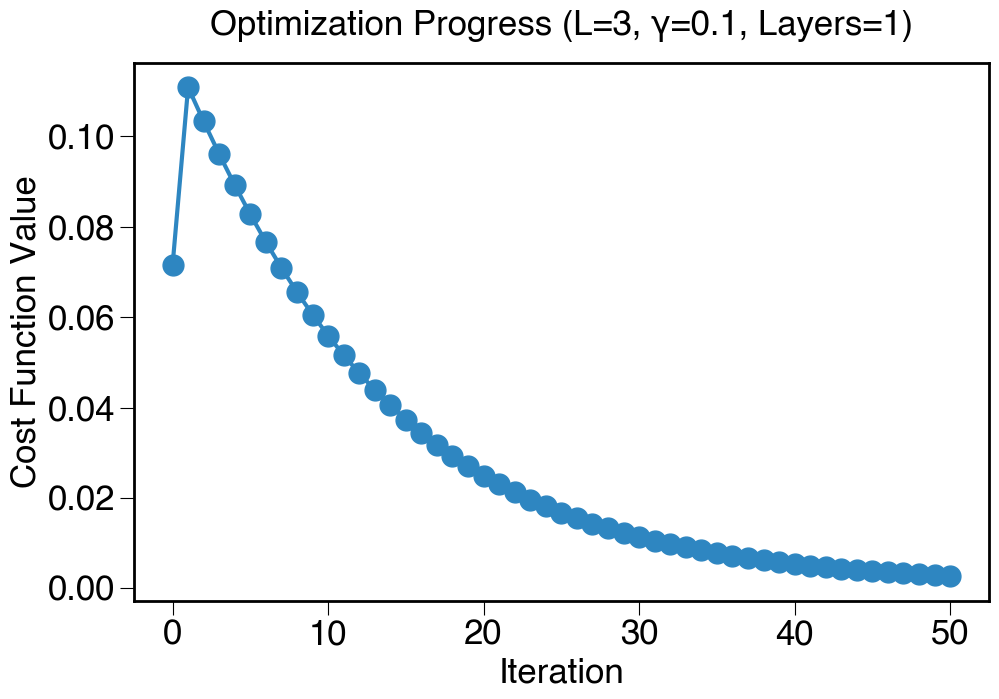

In [63]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(optimizer['cost_history'], 'o-', color='#2E86C1', linewidth = 3, markersize = 15)
plt.xlabel('Iteration', fontsize=med)
plt.ylabel('Cost Function Value', fontsize=med)
plt.title(f'Optimization Progress (L={L}, γ={gamma}, Layers={number_of_layers})', pad=20)
plt.tight_layout()
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(axis='both', which='major', length=10)   
plt.show()